In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def text_to_ascii(text:str):
    result = np.array([ord(a) for a in text])
    return result

def ascii_to_text(code):
    result = ''.join([chr(c) for c in code])
    return result

def distance(text_1, text_2):
    v_1 = text_to_ascii(text_1)
    v_2 = text_to_ascii(text_2)
    dist = np.linalg.norm(v_1 - v_2)
    return dist

def mate(text_1, text_2):
    length = len(text_1)
    pos = np.random.randint(0, length)
    child = text_1[:pos] + text_2[pos:]
    return child

def sample_domain(domain,length):
    result = ''.join(np.random.choice(np.array(list(domain)),size=length))
    return result

In [3]:
N = 100
alpha_offset = 65
domain = ascii_to_text(alpha_offset + np.arange(29*2)) + ' '
target = 'Daniel Osei Kwatia'
tgt_len = len(target)

In [4]:
print(domain)

ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz 


In [5]:
def mutate(text,domain, rate = 0.1):
    length = len(text)
    text_arr= list(text)
    for i in range(length):
        text_arr[i] = text_arr[i] if np.random.rand() > rate else sample_domain(domain,1)
    result = ''.join(text_arr)
    return result

In [6]:
#initialize the population
population = [{'text': sample_domain(domain, tgt_len), 'score':0.0} for _ in range(N)]

In [7]:
#function to perform the evolution
def run_evolution(population,target,domain,mutation_rate,num_iteration):
    population_size= len(population)
    half_pop_size = int(population_size/2)
    prob = np.ones(half_pop_size)/half_pop_size
    avg_scores=[]
    population = [{'text': p['text'], 'score': - distance(target, p['text'])} for p in population]
    for _ in range(num_iteration):
        population.sort(key=lambda i:i['score'], reverse=True)
        new_pop = []
        
        while len(new_pop) != num_iteration:
            parents = np.random.choice(population[:half_pop_size],2)
            child_text = mate(parents[0]['text'],parents[1]['text'])
            child_text = mutate(child_text, domain, rate= mutation_rate)
            child = {'text': child_text, 'score': 0}
            new_pop.append(child)
            
        #assign assign new population to 
        population = new_pop
        #compute the scores
        population = [{'text': p['text'], 'score': - distance(target, p['text'])} for p in population]
        
        avg_score = np.mean(list(map(lambda p:p['score'],population)))
        avg_scores.append(avg_score)
        
    population.sort(key=lambda i:i['score'], reverse=True)
    return population,avg_scores

In [8]:
population = [{'text': p['text'], 'score': - distance(target, p['text'])} for p in population]
num_iteration = 400
mutation_rate = 0.01

In [9]:
population, avg_scores=run_evolution(population, target, domain, mutation_rate, num_iteration)

In [10]:
#select the best
population[:10]

[{'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0},
 {'text': 'Daniel Osei Kwatia', 'score': -0.0}]

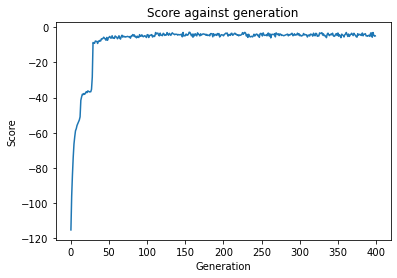

In [11]:
#display results
plt.title('Score against generation')
plt.plot(avg_scores)
plt.xlabel('Generation')
plt.ylabel('Score')
plt.show()